In [ ]:
import os

In [ ]:
import glob

In [ ]:
from IPython.display import Image, display

In [ ]:
from IPython import display

In [ ]:
display.clear_output()

In [ ]:
!nvidia-smi

Wed Nov 27 16:37:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
HOME = os.getcwd()

In [ ]:
%pip install ultralytics supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
import ultralytics

In [ ]:
ultralytics.checks()

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [ ]:
!pwd

/content


In [ ]:
mkdir datasets

In [ ]:
pwd

'/content'

In [ ]:
cd datasets/

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Q9amMhgOqhIZ4mst1p5k")
project = rf.workspace("huubinh").project("ppe_segmentation")
version = project.version(7)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Segmentation-7 in yolov11:: 100%|██████████| 814/814 [00:00<00:00, 5944.83it/s]


In [ ]:
%cd {HOME}

/content


In [ ]:
%cd {dataset.location}

/content/datasets/PPE_Segmentation-7


In [ ]:
!pwd


/content/datasets/PPE_Segmentation-7


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n-seg.pt data={dataset.location}/data.yaml epochs=150 imgsz=640 plots=True

/content
100% 5.90M/5.90M [00:00<00:00, 85.6MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/datasets/PPE_Segmentation-7/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visual

/content


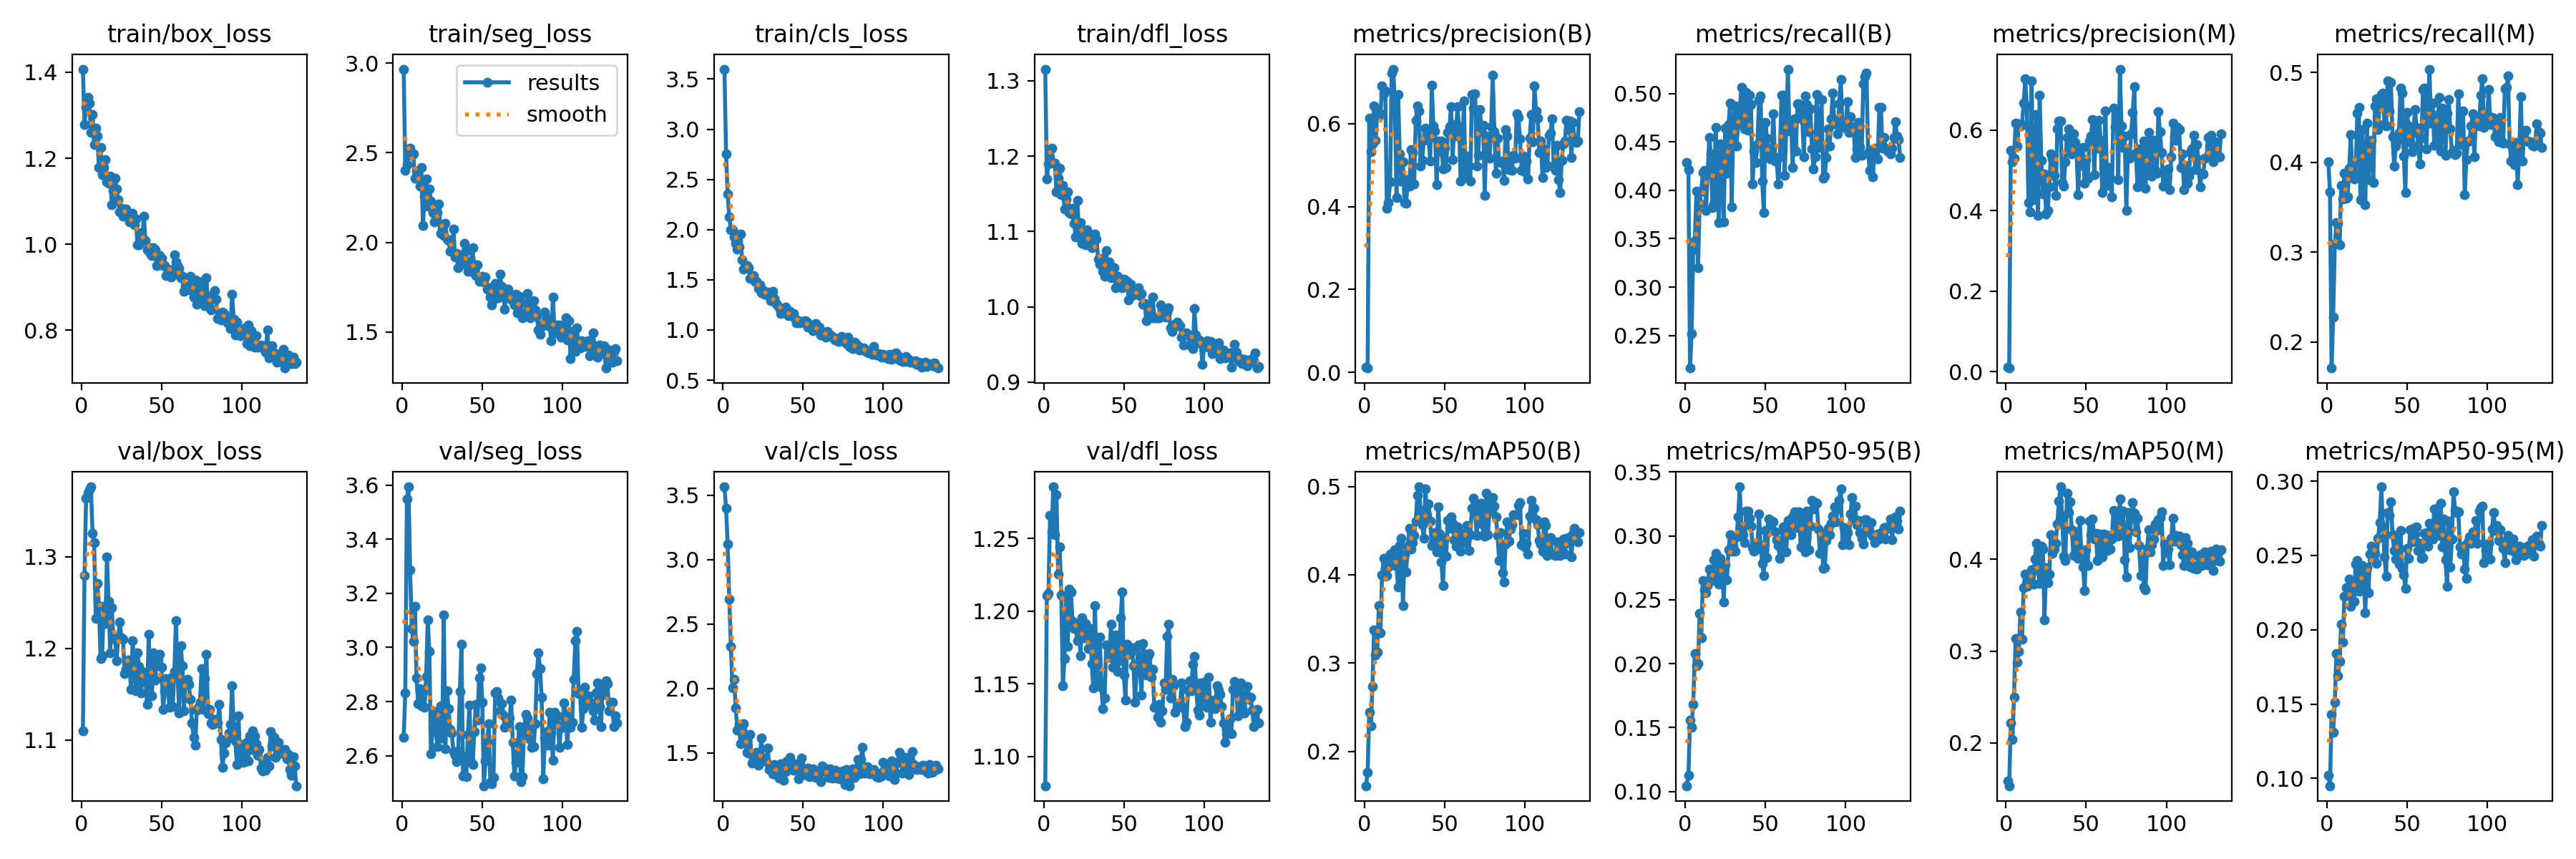

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=1000)

/content


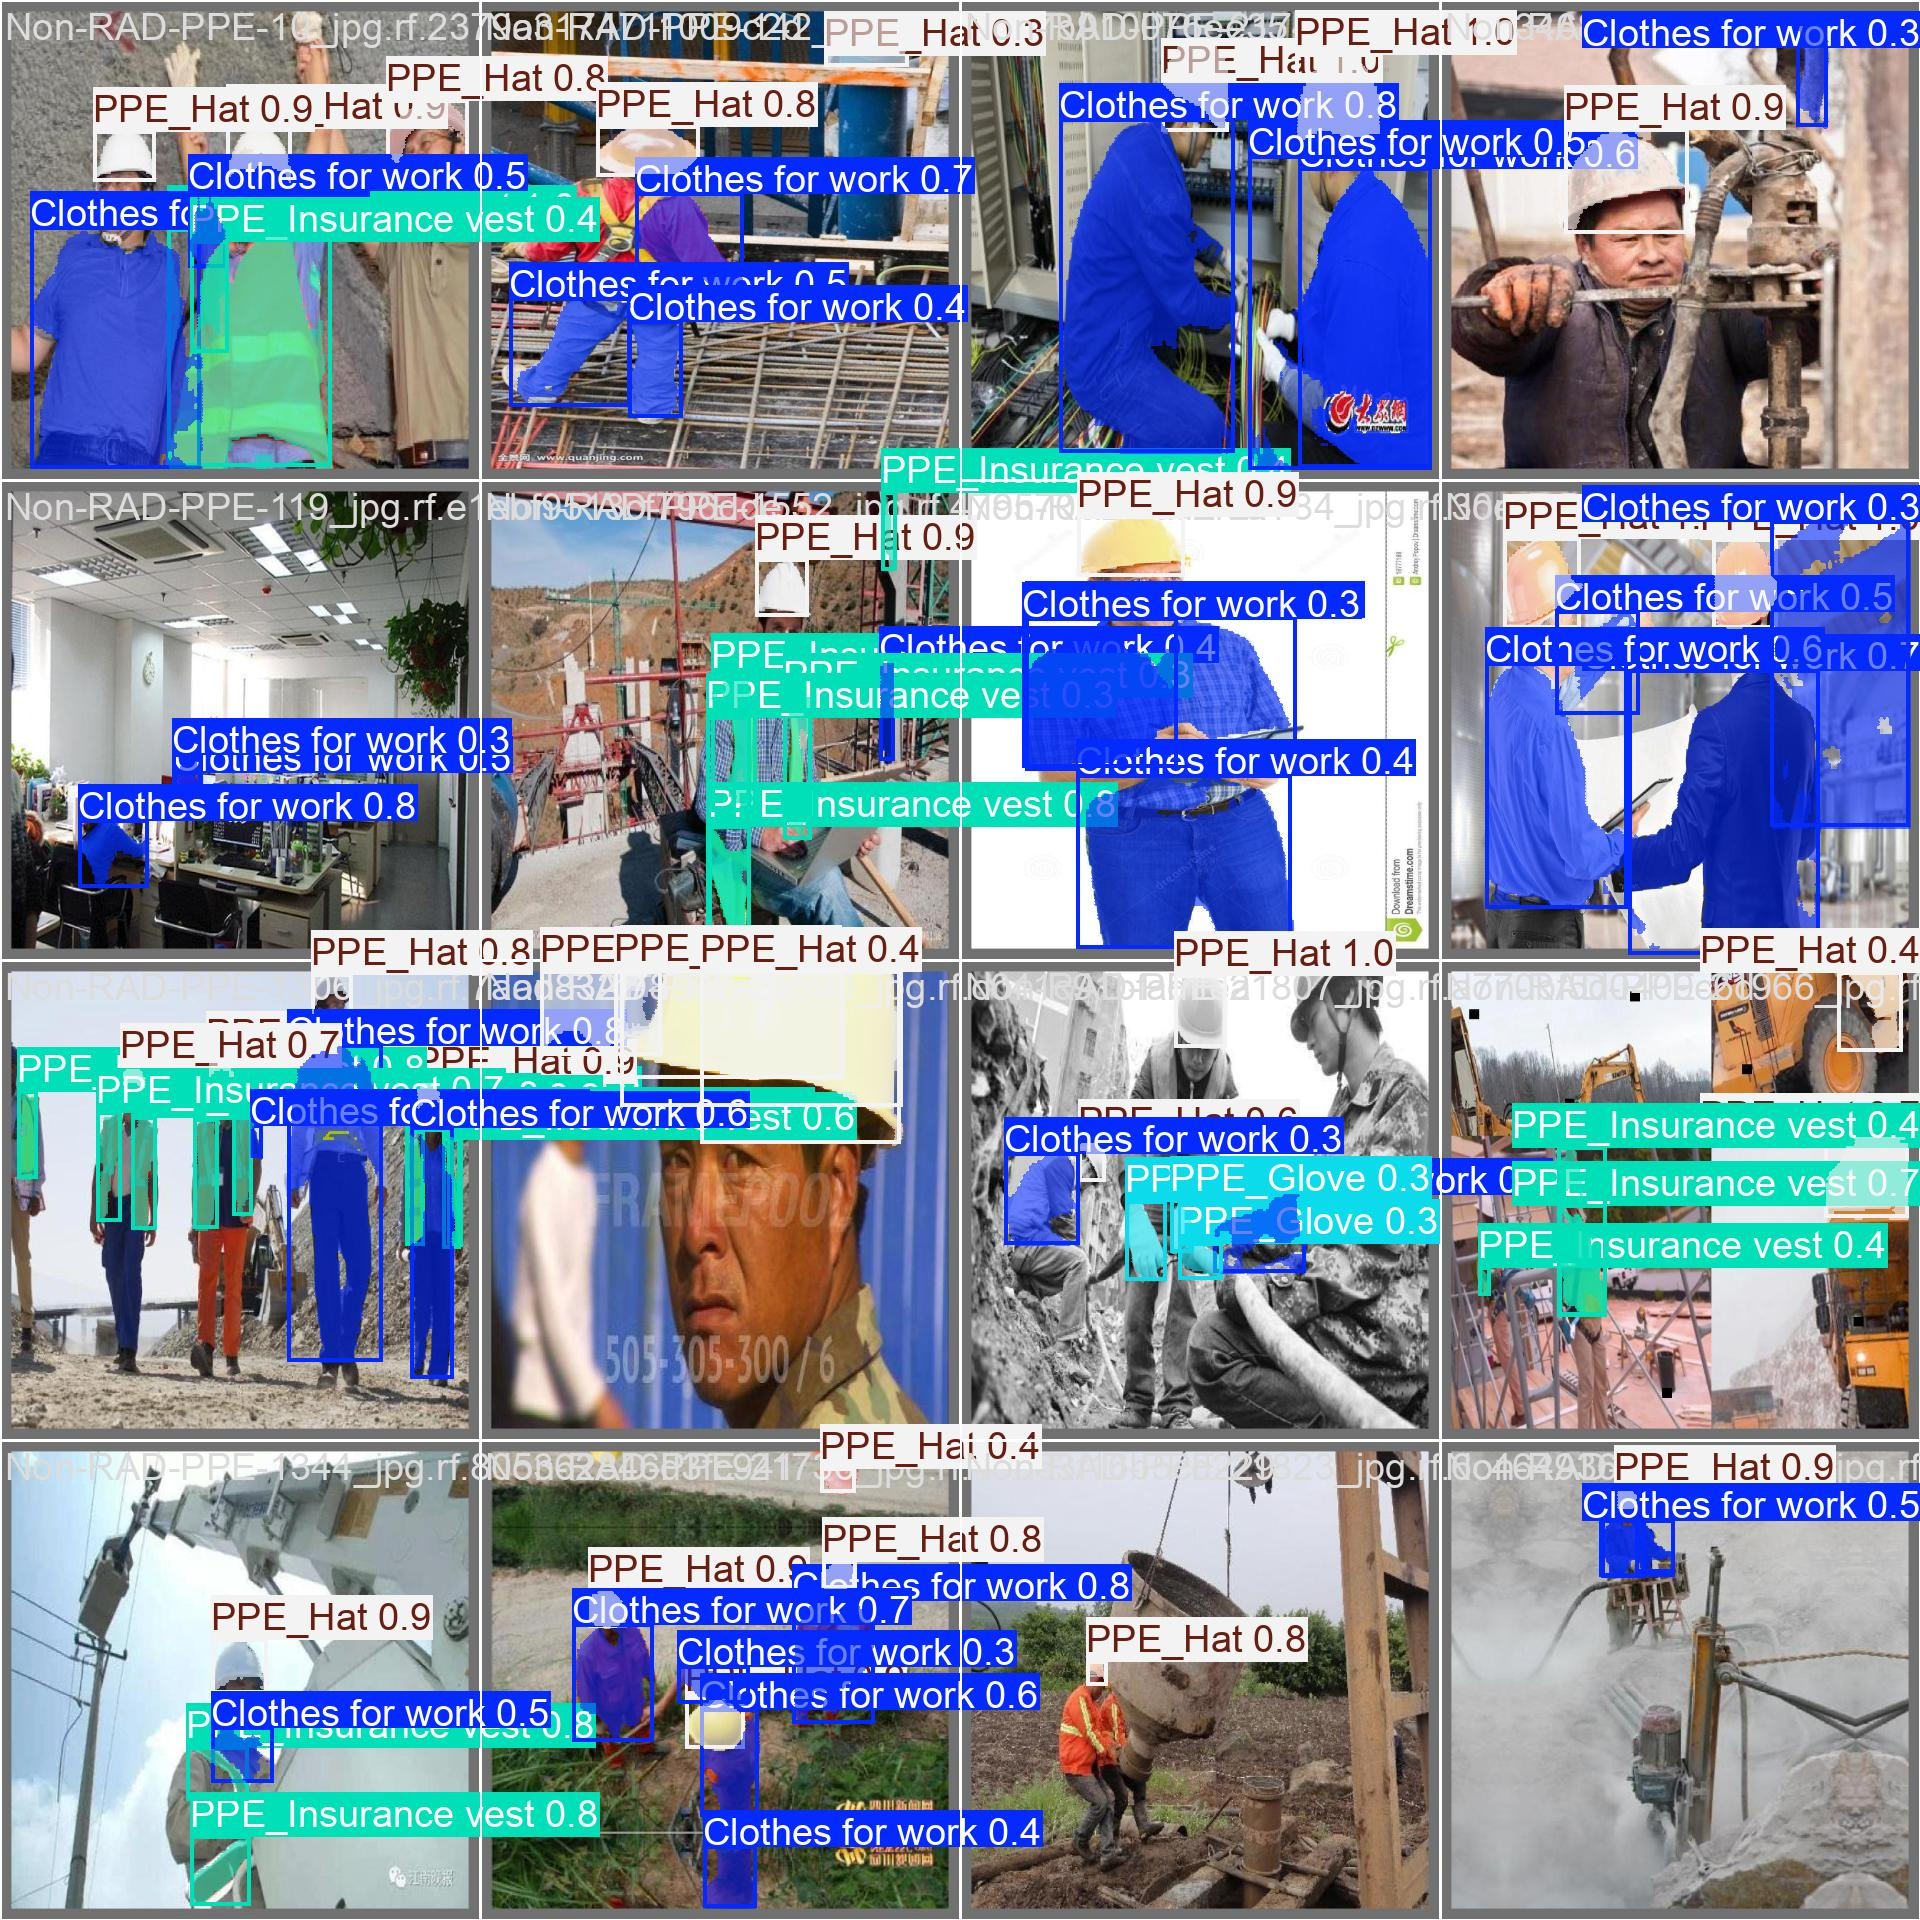

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=800)

/content


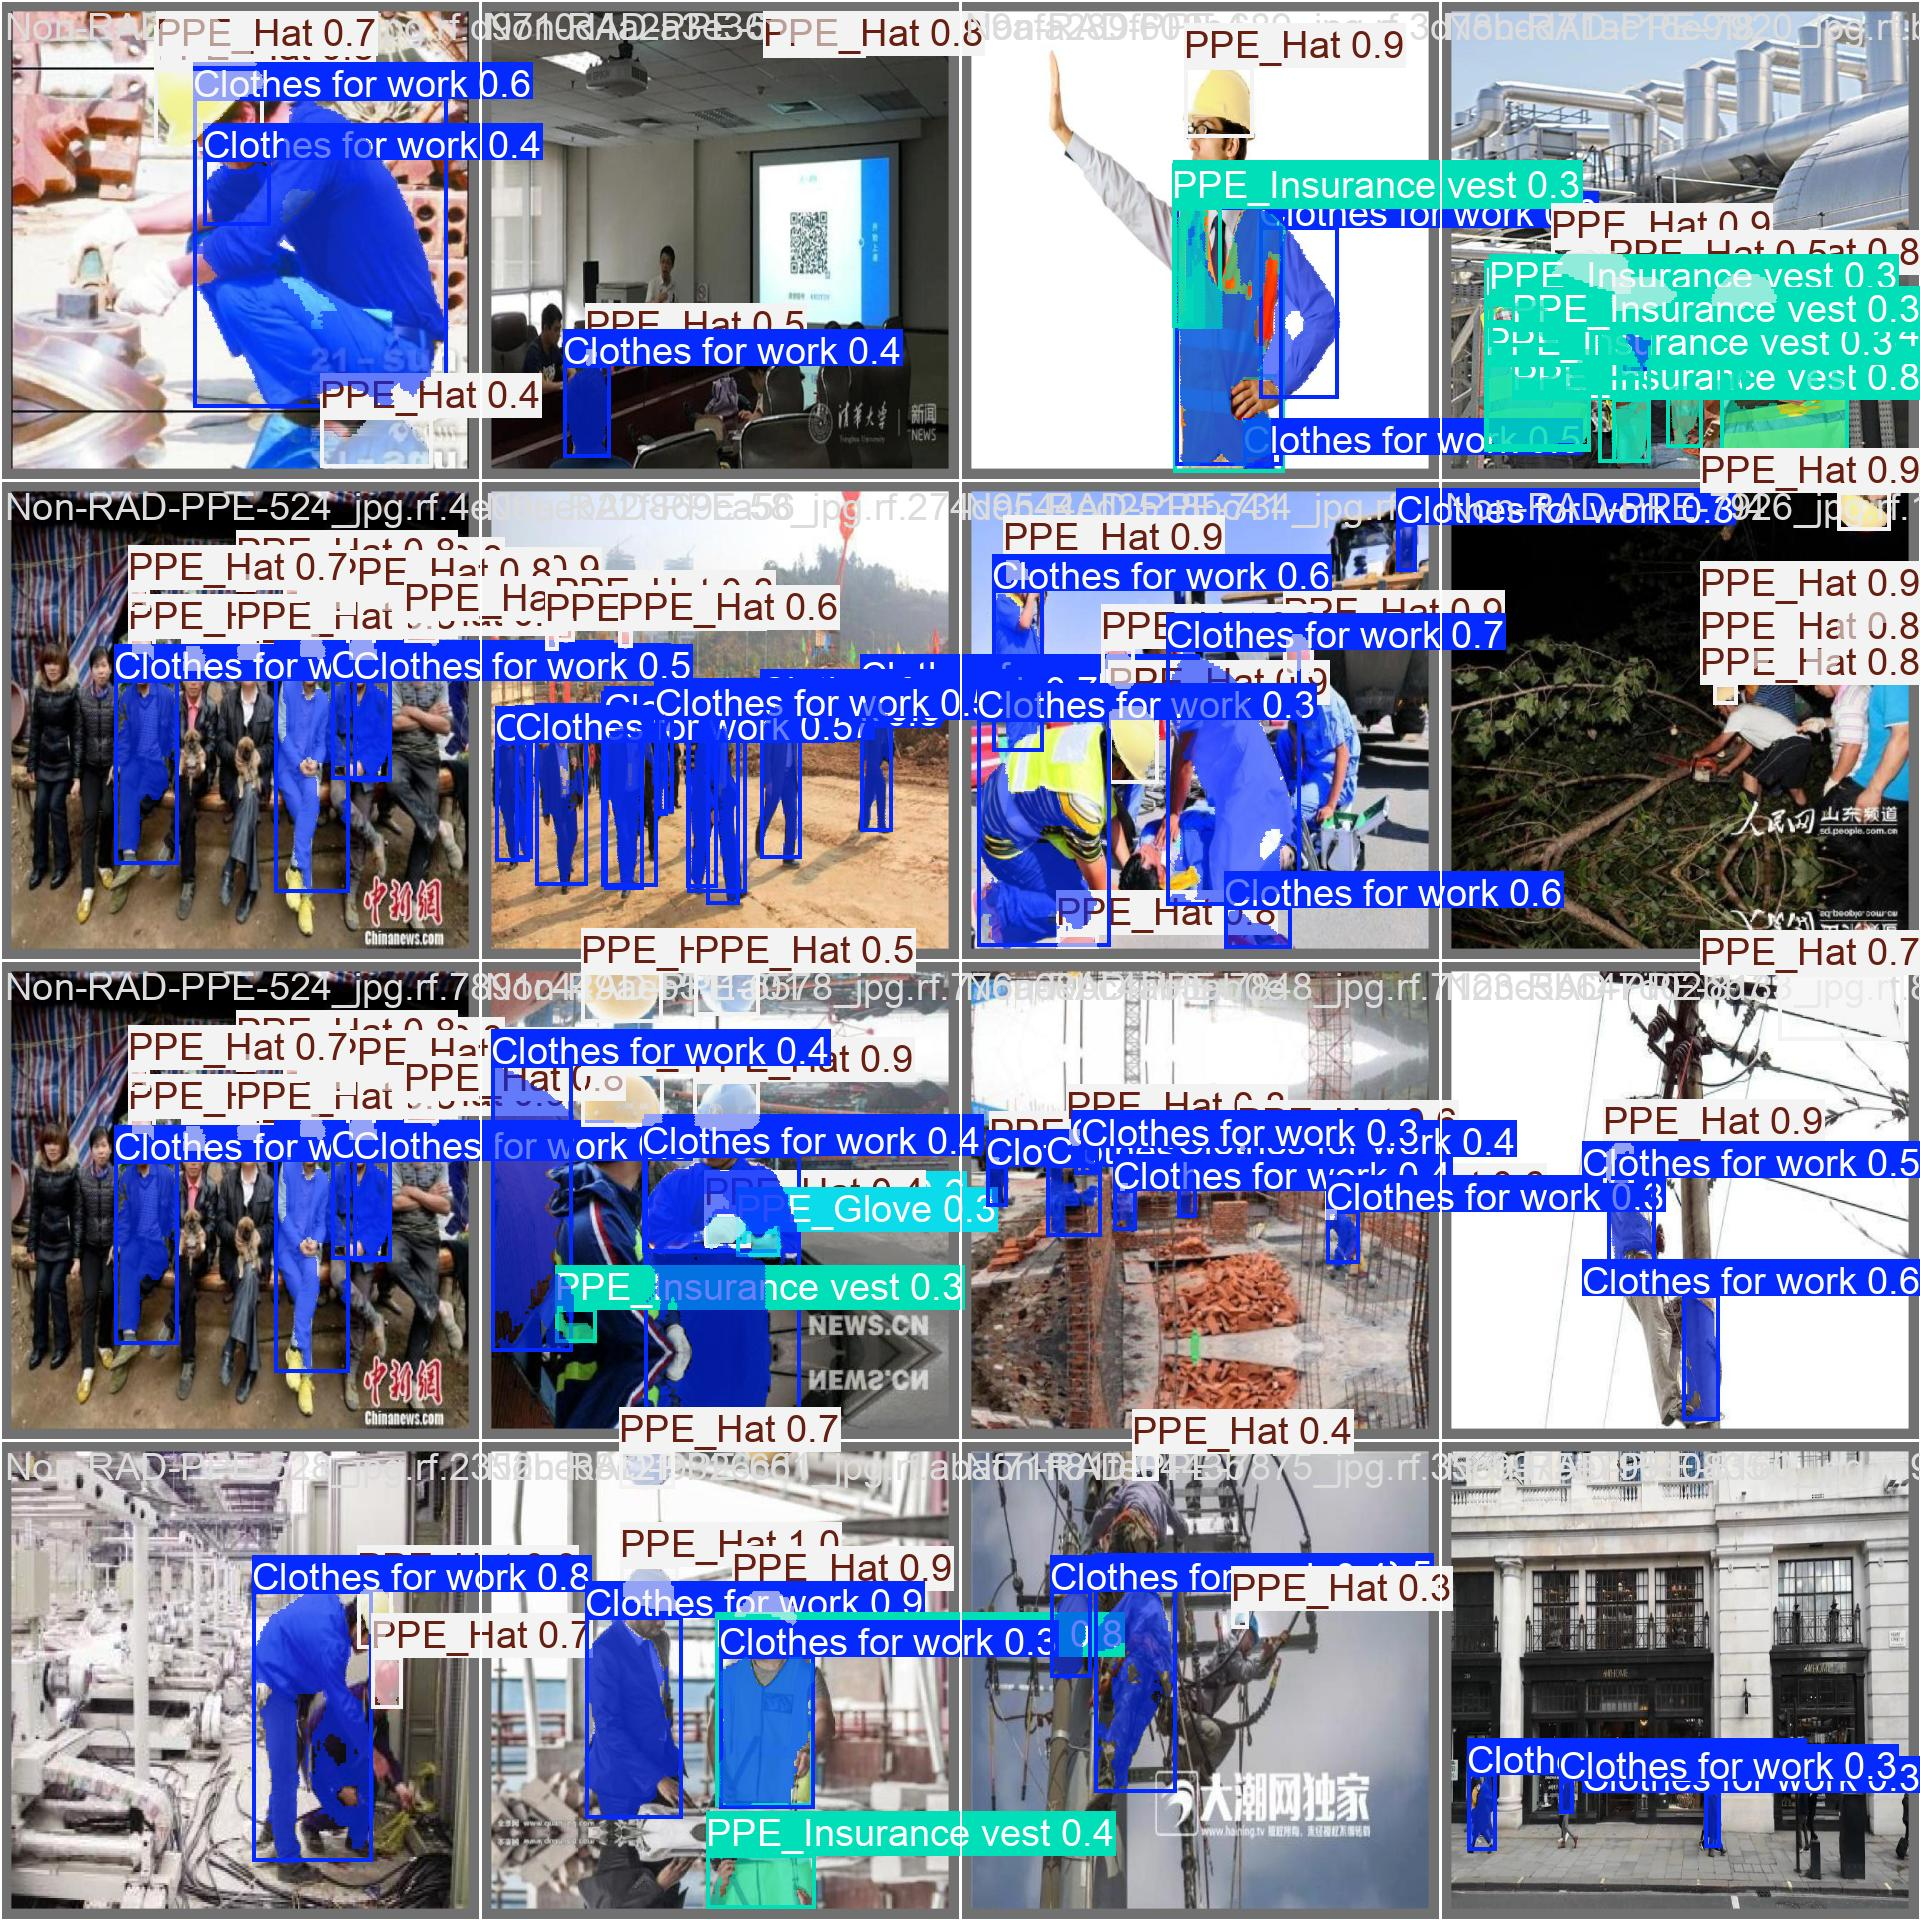

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch1_pred.jpg', width=800)

/content


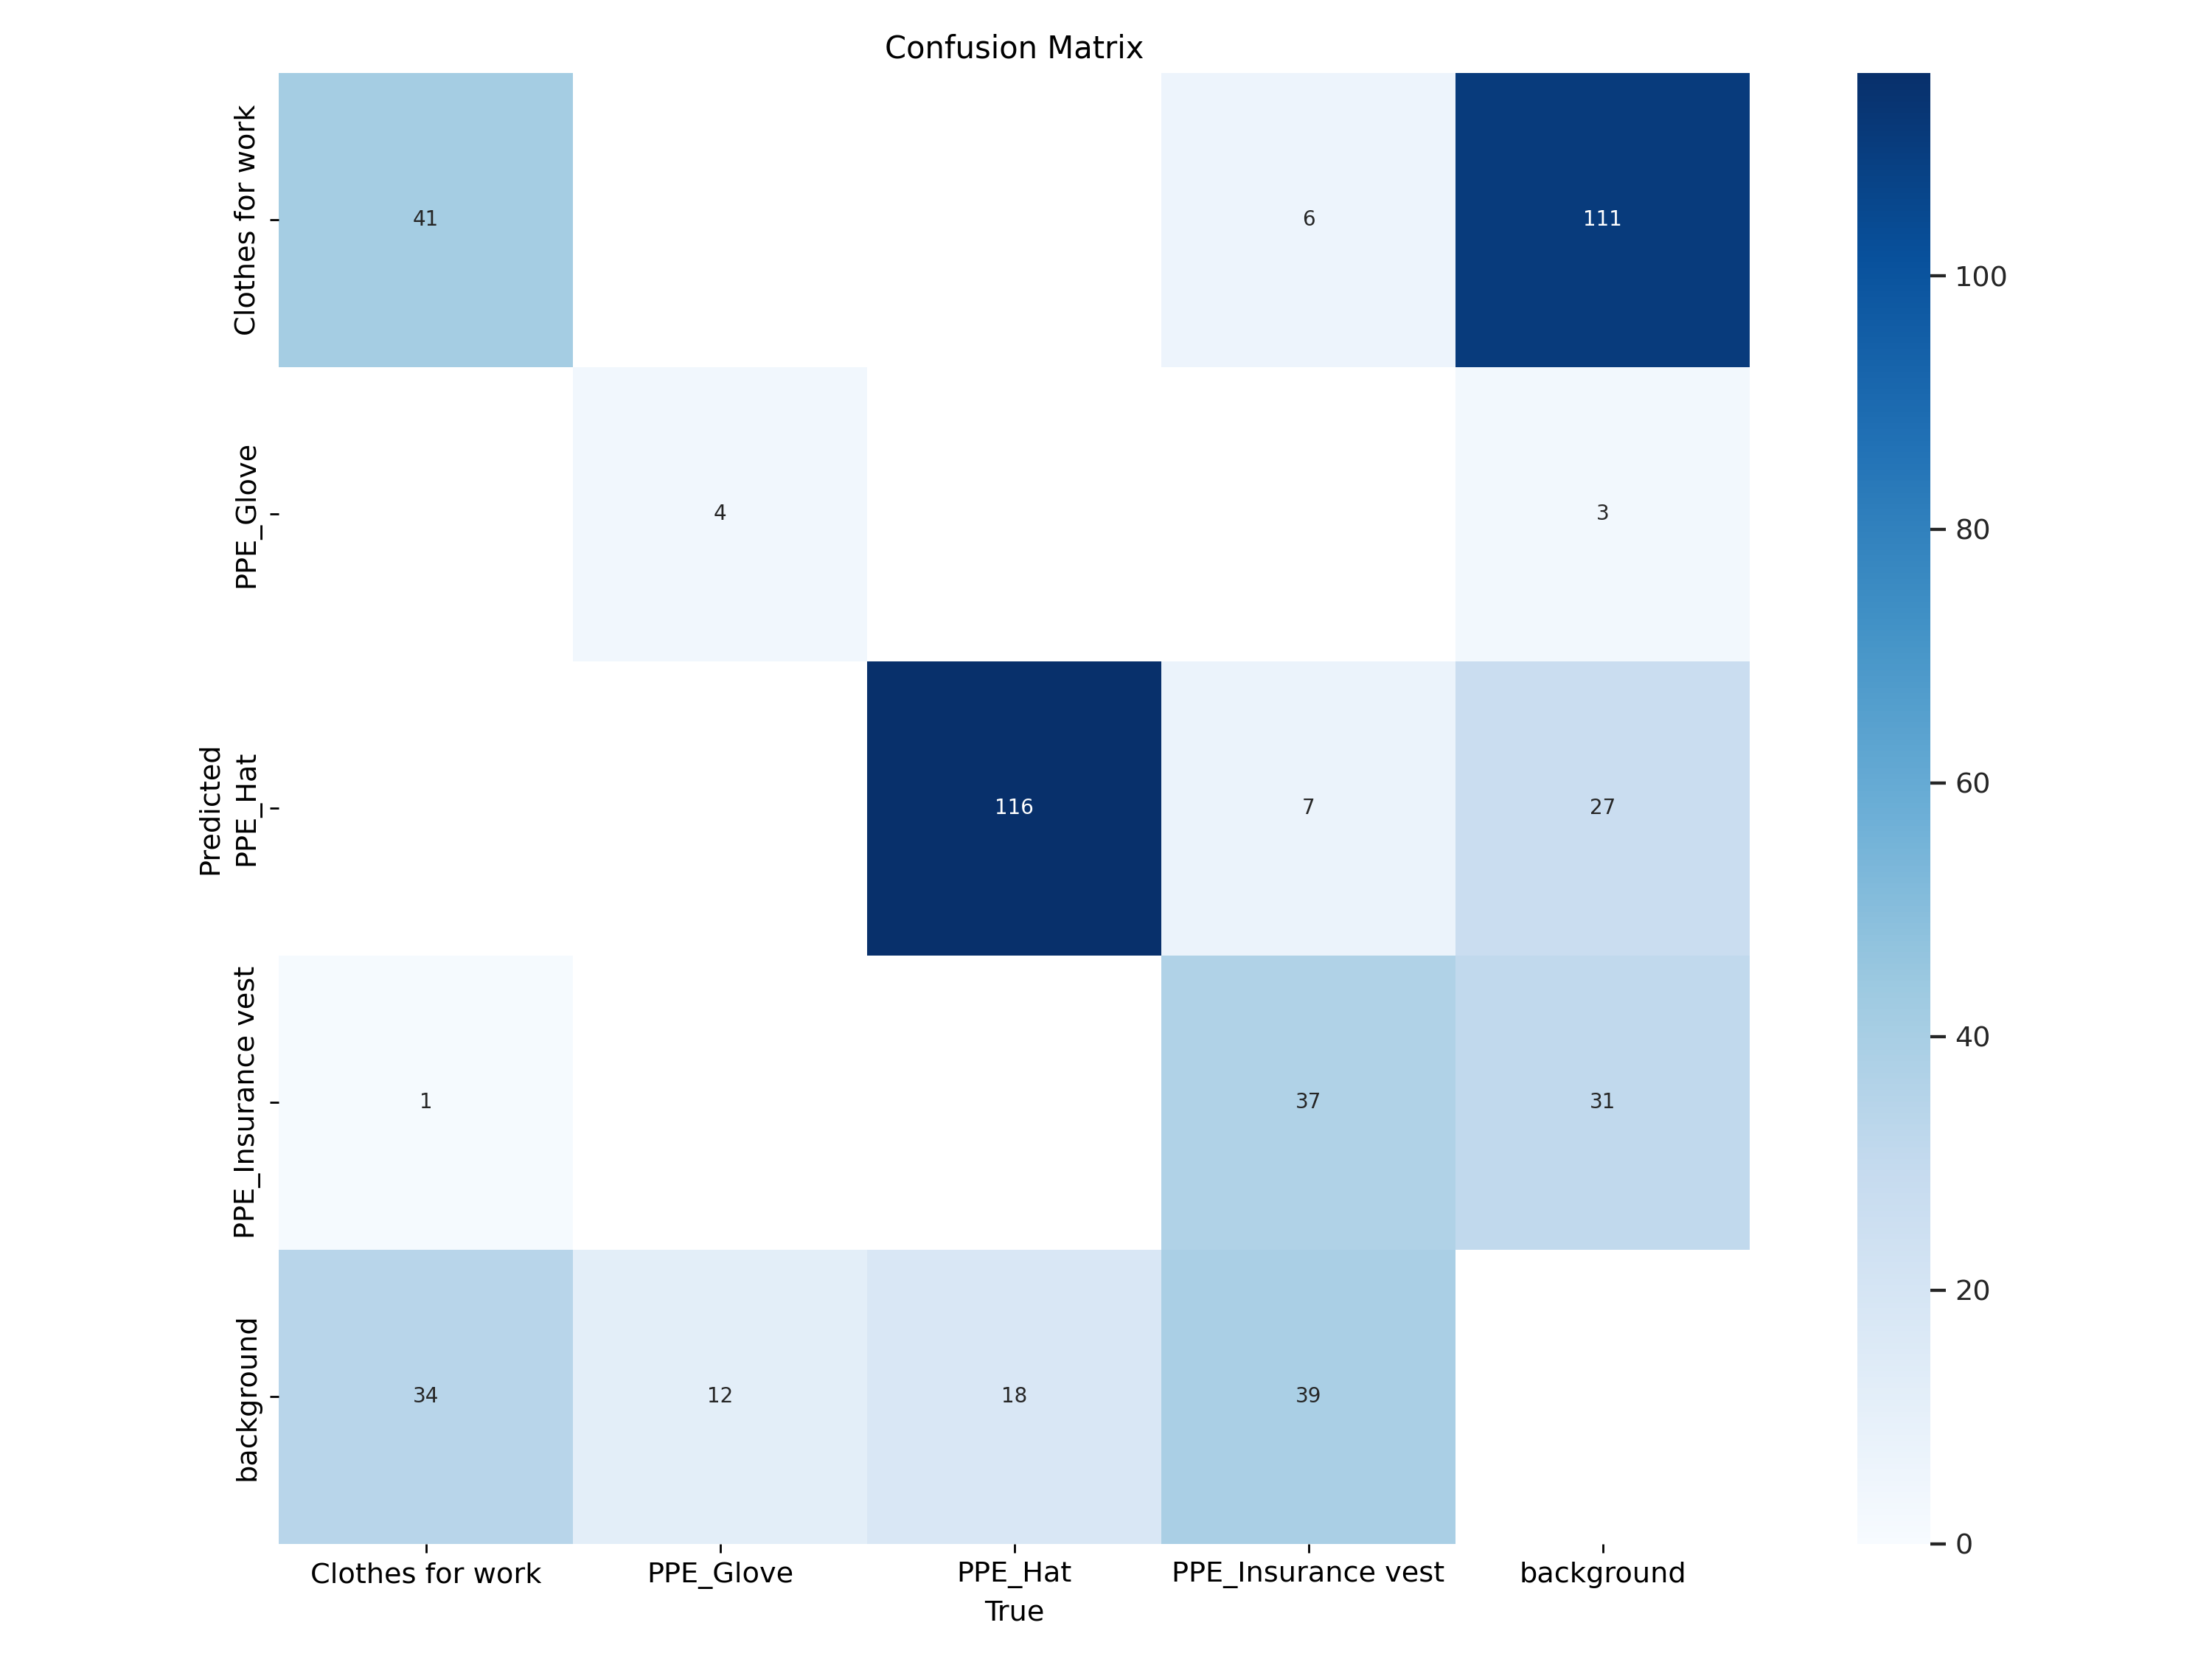

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=800)

In [ ]:
!pip install gdown


In [ ]:
file_id = '1dM70jjriS4Bf_h80N5UjeXCLWkEwC141'
!gdown https://drive.google.com/uc?id={file_id} -O /content/video.mp4


Downloading...
From: https://drive.google.com/uc?id=1dM70jjriS4Bf_h80N5UjeXCLWkEwC141
To: /content/video.mp4
100% 42.9M/42.9M [00:00<00:00, 61.8MB/s]


In [ ]:
cd /content/runs

/content/runs


In [ ]:
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt source='/content/video.mp4'


Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,835,348 parameters, 0 gradients, 10.2 GFLOPs

video 1/1 (frame 1/439) /content/video.mp4: 384x640 3 Clothes for works, 3 PPE_Hats, 4 PPE_Insurance vests, 51.5ms
video 1/1 (frame 2/439) /content/video.mp4: 384x640 3 Clothes for works, 3 PPE_Hats, 6 PPE_Insurance vests, 16.7ms
video 1/1 (frame 3/439) /content/video.mp4: 384x640 2 Clothes for works, 2 PPE_Hats, 4 PPE_Insurance vests, 15.5ms
video 1/1 (frame 4/439) /content/video.mp4: 384x640 2 Clothes for works, 2 PPE_Hats, 3 PPE_Insurance vests, 17.8ms
video 1/1 (frame 5/439) /content/video.mp4: 384x640 2 Clothes for works, 2 PPE_Hats, 2 PPE_Insurance vests, 16.1ms
video 1/1 (frame 6/439) /content/video.mp4: 384x640 3 Clothes for works, 3 PPE_Hats, 3 PPE_Insurance vests, 15.7ms
video 1/1 (frame 7/439) /content/video.mp4: 384x640 2 Clothes for works, 3 PPE_Hats, 3 PPE_Insurance vests, 15.6ms
video 1/1 (frame 8/439) 

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/video.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=640 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)